In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st
data = pd.read_csv("https://video.ittensive.com/math-stat/data-6048-2020-06-29.utf.csv", delimiter=';')

In [2]:
print(data.columns.tolist ()) # выводим название столбцов

['ID', 'Quarter', 'AveragePerCapita', 'global_id', 'WorkingPopulation', 'Seniors', 'Children', 'Resolution', 'Unnamed: 8']


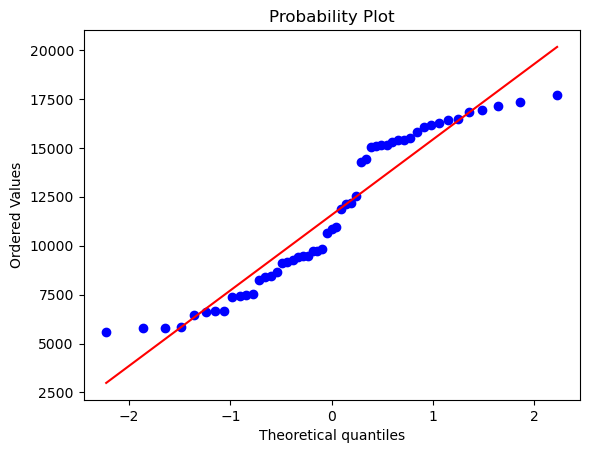

In [3]:
data_new1  = np.array(data['AveragePerCapita'])
st.probplot(data_new1, dist='norm', plot=plt)
plt.show()
#Данные почти полностью накрывают красную (базовую) линию: выборка очень точно соответствует нормальному распределению

In [ ]:
##Проведите дисперсионный анализ для серий Seniors и Children и установите,
##с каким p-уровнем значимости средние этих серий различаются

In [4]:
# величина прожиточного минимума для пожилый людей и детей
data_new2 = np.array(data['Seniors'])
data_new3 = np.array(data['Children'])

In [5]:
#Однофакторный дисперсионный анализ
stats = st.f_oneway(data_new1, data_new2, data_new3)

In [6]:
if stats[1] < 0.05:
    if st.ttest_ind(data_new1, data_new2)[1] < 0.05/3:
        print("Уровень ПМ Среднего на душу населения и ПМ пожилых людей различается")
    if st.ttest_ind(data_new2, data_new3)[1] < 0.05/3:
        print("Уровень ПМ пожилых людей и ПМ детей различается")
    if st.ttest_ind(data_new1, data_new3)[1] < 0.05/3:
        print("Уровень ПМ Среднего на душу населения и ПМ детей различается")
else:
    print ("Различий ПМ нет")

Уровень ПМ Среднего на душу населения и ПМ пожилых людей различается
Уровень ПМ пожилых людей и ПМ детей различается


In [ ]:
# Для упрощения вычислений вместо значений в ячейках столбца 'Quarter' будем использовать данные столбца 'ID'

Коэффициент детерминации: 0.9998899547230711


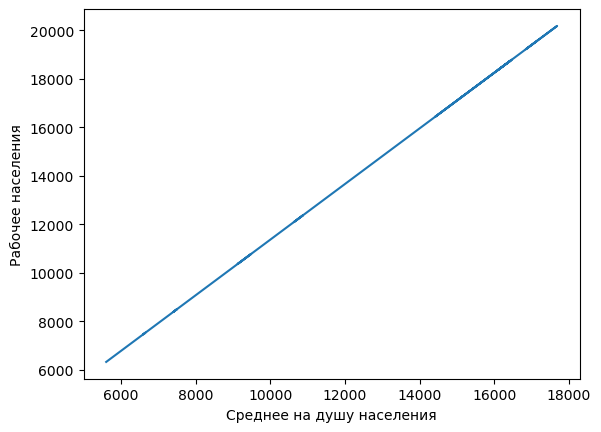

Коэффициент детерминации: 0.9981241437454869


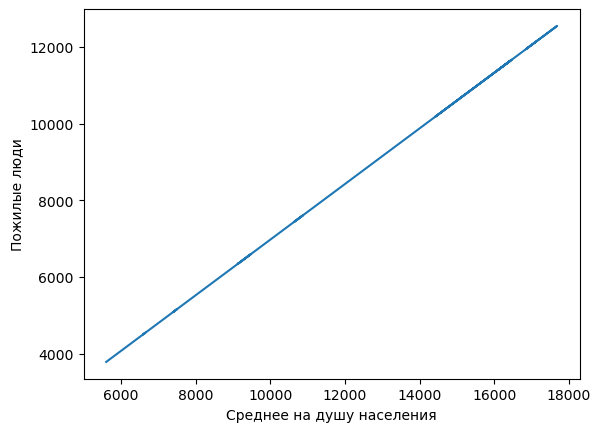

Коэффициент детерминации: 0.9989828715188048


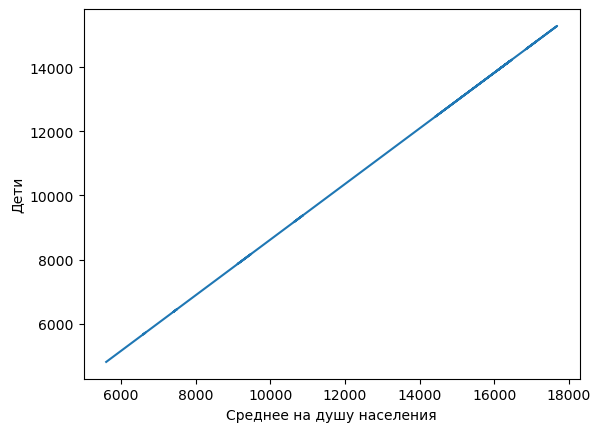

Коэффициент детерминации: -471559.9955189811


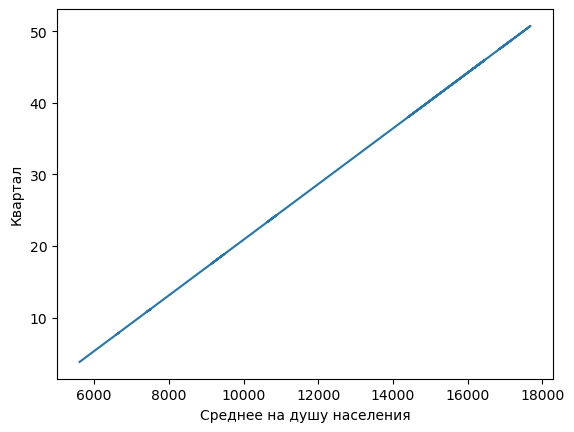

In [7]:
x = np.array(data['AveragePerCapita']).reshape((-1, 1))
y_W = np.array(data['WorkingPopulation']).reshape((-1, 1))
y_S = np.array(data['Seniors']).reshape((-1, 1))
y_C = np.array(data['Children']).reshape((-1, 1))
y_Q = np.array(data['ID']).reshape(-1, 1)
# создаем модель линейной регрессии к существующим данным
model_W = LinearRegression().fit(x, y_W)
model_S = LinearRegression().fit(x, y_S)
model_C = LinearRegression().fit(x, y_C)
model_Q = LinearRegression().fit(x, y_Q)
# найдем коэффициенты детерминации
r_sq_W = model_W.score(x, y_W)
y__W = np.array(x * model_W.coef_ + model_W.intercept_)#значения по регрессии

r_sq_S = model_S.score(x, y_S)
y__S = np.array(x * model_S.coef_ + model_S.intercept_)#значения по регрессии

r_sq_C = model_C.score(x, y_C)
y__C = np.array(x * model_C.coef_ + model_C.intercept_)#значения по регрессии

r_sq_Q = model_C.score(x, y_Q)
y__Q = np.array(x * model_Q.coef_ + model_Q.intercept_)#значения по регрессии

print("Коэффициент детерминации:", r_sq_W)
# построим график с учетом регрессии
plt.xlabel("Среднее на душу населения")
plt.ylabel("Рабочее населения")
plt.plot(x, y__W)
plt.show()

print("Коэффициент детерминации:", r_sq_S)
# построим график с учетом регрессии
plt.xlabel("Среднее на душу населения")
plt.ylabel("Пожилые люди")
plt.plot(x, y__S)
plt.show()

print("Коэффициент детерминации:", r_sq_C)
# построим график с учетом регрессии
plt.xlabel("Среднее на душу населения")
plt.ylabel("Дети")
plt.plot(x, y__C)
plt.show()

print("Коэффициент детерминации:", r_sq_Q)
# построим график с учетом регрессии
plt.xlabel("Среднее на душу населения")
plt.ylabel("Квартал")
plt.plot(x, y__Q)
plt.show()


In [8]:
#Проведем статистические тесты значимости результата "Среднее на душу населения" - "Рабочее населения"
yy__W = np.array(y_W - y__W).flatten() # ошибка регрессии
y_len_1_3 = round(len(y__W)/3) # 1/3 выборки
shapiro_W = st.shapiro(yy__W) # Тест Шапиро-Уилка для распределения ошибок
bartlett_W = st.bartlett(yy__W[0:y_len_1_3], yy__W[2*y_len_1_3:]) # тест Бартлета 
if r_sq_W > 0.7 and shapiro_W[1] < 0.05 and bartlett_W[1] < 0.05:
    print ("Уровень ПМ по критерию Среднее на душу населения будет снижаться:",
          int(np.ceil((2 - model_W.intercept_) / model_W.coef_)[0]))
else:
    print ("Уровень ПМ по критерию Среднее на душу населения будет возрастать")

Уровень ПМ по критерию Среднее на душу населения будет возрастать


In [9]:
#Проведем статистические тесты значимости результата "Среднее на душу населения" - "Пожилые люди"
yy__S = np.array(y_S - y__S).flatten() # ошибка регрессии
y_len_1_3 = round(len(y__S)/3) # 1/3 выборки
shapiro_S = st.shapiro(yy__S) # Тест Шапиро-Уилка для распределения ошибок
bartlett_S = st.bartlett(yy__S[0:y_len_1_3], yy__S[2*y_len_1_3:]) # тест Бартлета 
if r_sq_S > 0.7 and shapiro_S[1] < 0.05 and bartlett_S[1] < 0.05:
    print ("Уровень ПМ по критерию Среднее на душу населения будет снижаться:",
          int(np.ceil((2 - model_S.intercept_) / model_S.coef_)[0]))
else:
    print ("Уровень ПМ по критерию Среднее на душу населения будет возрастать")

Уровень ПМ по критерию Среднее на душу населения будет снижаться: 396


In [10]:
#Проведем статистические тесты значимости результата "Среднее на душу населения" - "Дети"
yy__C = np.array(y_C - y__C).flatten() # ошибка регрессии
y_len_1_3 = round(len(y__C)/3) # 1/3 выборки
shapiro_C = st.shapiro(yy__C) # Тест Шапиро-Уилка для распределения ошибок
bartlett_C = st.bartlett(yy__C[0:y_len_1_3], yy__C[2*y_len_1_3:]) # тест Бартлета 

if r_sq_C > 0.7 and shapiro_C[1] < 0.05 and bartlett_C[1] < 0.05:
    print ("Уровень ПМ по критерию Среднее на душу населения будет снижаться:",
          int(np.ceil((2 - model_C.intercept_) / model_C.coef_)[0]))
else:
    print ("Уровень ПМ по критерию Среднее на душу населения будет возрастать")

Уровень ПМ по критерию Среднее на душу населения будет снижаться: 75


In [11]:
yy__Q = np.array(y_Q - y__Q).flatten() # ошибка регрессии
y_len_1_3 = round(len(y__Q)/3) # 1/3 выборки
shapiro_Q = st.shapiro(yy__Q) # Тест Шапиро-Уилка для распределения ошибок
bartlett_Q = st.bartlett(yy__Q[0:y_len_1_3], yy__Q[2*y_len_1_3:]) # тест Бартлета 
if r_sq_Q > 0.7 and shapiro_Q[1] < 0.05 and bartlett_Q[1] < 0.05:
    print ("Уровень ПМ по критерию Среднее на душу населения будет снижаться:",
          int(np.ceil((2 - model_Q.intercept_) / model_Q.coef_)[0]))
else:
    print ("Уровень ПМ по критерию Среднее на душу населения будет возрастать")

Уровень ПМ по критерию Среднее на душу населения будет возрастать
